In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

# Set the seed for reproducibility
seed_value = 42
tf.random.set_seed(seed_value)
import numpy as np

# Set the seed for NumPy
np.random.seed(seed_value)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set device
data_transform = tf.keras.Sequential([
    tf.keras.layers.Resizing(128, 128),
    tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]
])

images, labels = [], []
n = m = s = 0
dataset_path = '/content/drive/MyDrive/cataract_project/cataract-dataset/'

for root, dir, files in os.walk(dataset_path):
    for f in files:
        if 'normal' in f:
            labels.append(0)
            n += 1
        elif 'mild' in f:
            labels.append(1)
            m += 1
        elif 'severe' in f:
            labels.append(2)
            s += 1

        img_path = os.path.join(root, f)
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img)
        img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
        transformed_img = data_transform(img_array)
        images.append(transformed_img[0])  # Remove batch dimension

print(n, m, s)

166 55 164




```python
import os
```
- This line imports the `os` module, which provides functions for interacting with the operating system. It allows you to work with file paths, directories, and perform file-related operations.

```python
import tensorflow as tf
```
- This line imports the `tensorflow` library and assigns it the alias `tf`. TensorFlow is an open-source library developed by Google for machine learning and deep learning tasks.

```python
from tensorflow.keras.preprocessing.image import load_img, img_to_array
```
- This line imports two functions, `load_img` and `img_to_array`, from the `tensorflow.keras.preprocessing.image` module. These functions are used for loading and preprocessing images.

```python
data_transform = tf.keras.Sequential([
    tf.keras.layers.Resizing(128, 128),
    tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]
])
```
- Here, we define a data transformation pipeline using `tf.keras.Sequential`. It is a sequential model that consists of two layers:
  - `tf.keras.layers.Resizing(128, 128)`: This layer resizes the input images to a fixed size of 128x128 pixels.
  - `tf.keras.layers.Rescaling(1./255)`: This layer rescales the pixel values of the images from the range [0, 255] to [0, 1] by dividing each pixel value by 255. This is a common normalization technique.

```python
images, labels = [], []
```
- We initialize two empty lists, `images` and `labels`, to store the preprocessed images and their corresponding labels.

```python
n = m = s = 0
```
- We initialize three variables, `n`, `m`, and `s`, to keep track of the count of images in each category (normal, mild, severe). They are all initially set to 0.

```python
dataset_path = '/content/drive/MyDrive/cataract_project/cataract-dataset/'
```
- This line specifies the path to the directory where the cataract dataset is located. You should replace this path with the actual path to your dataset.

```python
for root, dir, files in os.walk(dataset_path):
    for f in files:
        # ...
```
- We use a nested loop to iterate over the files in the dataset directory and its subdirectories.
- `os.walk(dataset_path)` generates a tuple `(root, dir, files)` for each directory it visits:
  - `root` is the current directory path.
  - `dir` is a list of subdirectories in the current directory.
  - `files` is a list of files in the current directory.
- We iterate over each file `f` in the `files` list.

```python
        if 'normal' in f:
            labels.append(0)
            n += 1
        elif 'mild' in f:
            labels.append(1)
            m += 1
        elif 'severe' in f:
            labels.append(2)
            s += 1
```
- Inside the loop, we check the filename `f` to determine the category of the image:
  - If the filename contains the word 'normal', we append the label 0 to the `labels` list and increment the `n` counter.
  - If the filename contains the word 'mild', we append the label 1 to the `labels` list and increment the `m` counter.
  - If the filename contains the word 'severe', we append the label 2 to the `labels` list and increment the `s` counter.

```python
        img_path = os.path.join(root, f)
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img)
```
- We construct the full path to the image file using `os.path.join(root, f)`, which joins the current directory path `root` with the filename `f`.
- We load the image using `load_img()` from the `tensorflow.keras.preprocessing.image` module. The `target_size` parameter is set to (128, 128) to resize the image to the desired size.
- We convert the loaded image to a NumPy array using `img_to_array()`.

```python
        img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
        transformed_img = data_transform(img_array)
        images.append(transformed_img[0])  # Remove batch dimension
```
- We add an extra dimension to the `img_array` using `tf.expand_dims()` with `axis=0`. This is necessary because the data transformation pipeline expects a batch of images, even if we are processing a single image.
- We apply the data transformation pipeline `data_transform` to the `img_array` to resize and normalize the image.
- We remove the batch dimension from the transformed image using `transformed_img[0]` and append it to the `images` list.

```python
print(n, m, s)
```
- Finally, we print the values of `n`, `m`, and `s`, which represent the counts of images in each category (normal, mild, severe).

This code iterates over the files in the specified dataset directory, loads each image, applies data transformations (resizing and normalization), and stores the transformed images and their corresponding labels in the `images` and `labels` lists. It also keeps track of the count of images in each category.


1. Adding an extra dimension using `tf.expand_dims()`:
   ```python
   img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
   ```
   - In TensorFlow, the input to a model is typically expected to be a batch of images, even if you are processing a single image.
   - The shape of `img_array` after converting it from the loaded image is `(height, width, channels)`, where `height` and `width` are the dimensions of the image, and `channels` is the number of color channels (e.g., 3 for RGB images).
   - However, the data transformation pipeline (`data_transform`) expects the input to have an additional dimension representing the batch size, i.e., `(batch_size, height, width, channels)`.
   - By using `tf.expand_dims()` with `axis=0`, we add an extra dimension at the beginning of the `img_array`, effectively creating a batch of size 1. The resulting shape becomes `(1, height, width, channels)`.
   - This step is necessary to ensure compatibility with the data transformation pipeline, which is designed to work with batches of images.

2. Applying the data transformation pipeline:
   ```python
   transformed_img = data_transform(img_array)
   ```
   - The `data_transform` pipeline, defined earlier in the code, consists of two layers: resizing and normalization.
   - By passing `img_array` (which now has the batch dimension) to `data_transform`, the image undergoes the specified transformations.
   - The resizing layer (`tf.keras.layers.Resizing(128, 128)`) resizes the image to a fixed size of 128x128 pixels. This ensures that all images in the dataset have consistent dimensions.
   - The normalization layer (`tf.keras.layers.Rescaling(1./255)`) rescales the pixel values from the range [0, 255] to [0, 1]. This is a common preprocessing step that helps to standardize the input data and can improve the convergence of the model during training.
   - After applying the transformations, the resulting `transformed_img` has the shape `(1, 128, 128, channels)`, where the first dimension represents the batch size of 1.

3. Removing the batch dimension:
   ```python
   images.append(transformed_img[0])  # Remove batch dimension
   ```
   - Since we added an extra batch dimension to `img_array` before applying the transformations, the resulting `transformed_img` also has the batch dimension.
   - However, for the purpose of storing the preprocessed images in the `images` list, we want to remove the batch dimension and keep only the image itself.
   - By indexing `transformed_img[0]`, we access the first (and only) image in the batch, effectively removing the batch dimension.
   - The resulting image has the shape `(128, 128, channels)`, which represents a single preprocessed image.
   - We append this preprocessed image to the `images` list, which will store all the transformed images in the dataset.

These steps are crucial for preparing the images to be fed into a machine learning model. By adding the batch dimension, applying the necessary transformations, and then removing the batch dimension, we ensure that the images are in the expected format and have consistent dimensions and scales.

The `images` list will contain all the preprocessed images, ready to be used for training or inference tasks in TensorFlow.

In [ ]:
images[0], labels[0]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=99)

In [6]:
import tensorflow as tf

def create_dataset(dataX, labels):
    dataset = tf.data.Dataset.from_tensor_slices((dataX, labels))
    return dataset

train_dataset = create_dataset(X_train, y_train)
train_loader = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size=1)

test_dataset = create_dataset(X_test, y_test)
test_loader = test_dataset.batch(batch_size=1)

Certainly! Let's go through the TensorFlow code step by step and explain each part in detail.

```python
import tensorflow as tf
```
This line imports the TensorFlow library and aliases it as `tf`. TensorFlow is an open-source machine learning framework that allows you to build and train neural networks efficiently.

```python
def create_dataset(dataX, labels):
    dataset = tf.data.Dataset.from_tensor_slices((dataX, labels))
    return dataset
```
Here, we define a function called `create_dataset` that takes two arguments: `dataX` and `labels`.
- `dataX` represents the input features or data points that we want to use for training or testing our model. It could be a NumPy array or a TensorFlow tensor containing the feature values.
- `labels` represents the corresponding labels or target values associated with each data point in `dataX`. It should have the same length as `dataX`.

Inside the function, we create a TensorFlow dataset using `tf.data.Dataset.from_tensor_slices`. This function takes a tuple of tensors (`dataX` and `labels`) and creates a dataset where each element of the dataset is a tuple of the corresponding elements from `dataX` and `labels`. In other words, it creates a dataset that pairs each data point with its corresponding label.

Finally, the function returns the created dataset.

```python
train_dataset = create_dataset(X_train, y_train)
```
This line creates the training dataset by calling the `create_dataset` function with `X_train` and `y_train` as arguments.
- `X_train` is the input data (features) for training the model.
- `y_train` is the corresponding labels or target values for the training data.

The resulting `train_dataset` is a TensorFlow dataset that contains the paired training data and labels.

```python
train_loader = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size=1)
```
Here, we create a data loader for the training dataset. The data loader is responsible for batching the data and providing an iterable over the dataset during training.

We start with the `train_dataset` and apply two transformations to it:
1. `shuffle`: This transformation randomly shuffles the elements of the dataset. The `buffer_size` argument specifies the number of elements to be buffered for shuffling. In this case, we set it to `len(X_train)`, which means the entire training dataset will be shuffled.
2. `batch`: This transformation groups the elements of the dataset into batches of a specified size. Here, we set `batch_size=1`, which means each batch will contain only one sample. You can increase the batch size to process multiple samples at once.

The resulting `train_loader` is a TensorFlow dataset that provides an iterable over the shuffled and batched training data.

```python
test_dataset = create_dataset(X_test, y_test)
test_loader = test_dataset.batch(batch_size=1)
```
These lines create the test dataset and data loader, similar to the training dataset and loader.
- `X_test` is the input data (features) for testing the model.
- `y_test` is the corresponding labels or target values for the test data.

We create the `test_dataset` by calling the `create_dataset` function with `X_test` and `y_test`.

Then, we create the `test_loader` by applying the `batch` transformation to the `test_dataset`. Here, we set `batch_size=1`, but you can adjust it based on your requirements. Note that we don't shuffle the test dataset because we want to evaluate the model on the original order of the test samples.

The `test_loader` provides an iterable over the batched test data.

These data loaders (`train_loader` and `test_loader`) can be used during the training and evaluation phases of your TensorFlow model. You can iterate over the data loaders to get batches of input features and labels, feed them to your model, and perform training or evaluation steps accordingly.

By using the `tf.data.Dataset` API, you can efficiently load and preprocess your data, handle large datasets that don't fit into memory, and take advantage of parallelism and performance optimizations provided by TensorFlow.

Yes, you're correct! The main purpose of using data loaders (both for training and testing) is to efficiently load and preprocess the data in a format that is easy to feed into your model. Data loaders take care of batching, shuffling, and other data-related operations, making it convenient to iterate over the dataset during training and evaluation.

Regarding the batch size, using a batch size of 1 means that in each iteration of training or testing, the model processes a single sample at a time. On the other hand, using a larger batch size means processing multiple samples together in each iteration.

The choice of batch size has several implications:

1. Computational efficiency: Processing samples in batches is generally more computationally efficient than processing them one by one. When you process a batch of samples, you can take advantage of parallelism and leverage the vectorized operations of deep learning frameworks like TensorFlow. This can lead to faster training and inference times.

2. Memory usage: Larger batch sizes require more memory to store the intermediate activations and gradients during training. If you have limited memory resources, using a smaller batch size can help fit the computations within the available memory.

3. Convergence and stability: The batch size can affect the convergence and stability of the training process. When using a batch size of 1 (also known as stochastic gradient descent or online learning), the model updates its parameters after each individual sample. This can lead to noisy and less stable parameter updates, but it can also help the model escape local minima and converge faster in some cases. On the other hand, using larger batch sizes (known as mini-batch gradient descent) provides more stable parameter updates and can lead to smoother convergence, but it may require more iterations to reach convergence.

4. Generalization: The choice of batch size can impact the model's ability to generalize to unseen data. Smaller batch sizes introduce more noise and stochasticity in the training process, which can help the model generalize better. Larger batch sizes may lead to overfitting if the model starts to memorize the training data instead of learning meaningful patterns.

When using a batch size of 1, the loss and gradients are computed for each individual sample in each iteration. This means that the model updates its parameters based on the loss and gradients of a single sample at a time. The implications of this approach are:

- The model can adapt quickly to each individual sample, which can be beneficial if the samples have diverse characteristics or if the dataset is small.
- The training process can be more noisy and less stable compared to using larger batch sizes, as the model's parameters are updated based on individual samples rather than averaged over a batch.
- The model may converge faster in terms of the number of iterations, but the overall training time may be longer due to the increased number of iterations required.

In practice, the choice of batch size depends on various factors such as the dataset size, model complexity, available computational resources, and desired training characteristics. It's common to experiment with different batch sizes and find a value that balances computational efficiency, convergence speed, and generalization performance for your specific task and dataset.

In [7]:
len(train_loader), len(test_loader)

(288, 97)

In [8]:
import tensorflow as tf

class CNN(tf.keras.Model):
    def __init__(self, num_classes=3):
        super(CNN, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=3, strides=1, padding='same', activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(filters=6, kernel_size=3, strides=1, padding='same', activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(filters=12, kernel_size=3, strides=1, padding='same', activation='relu')
        self.pool = tf.keras.layers.MaxPool2D(pool_size=2)
        self.flatten = tf.keras.layers.Flatten()
        self.fc = tf.keras.layers.Dense(units=num_classes, activation='softmax')

    def call(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = self.pool(self.conv3(x))
        x = self.flatten(x)
        x = self.fc(x)
        return x

Certainly! Let's go through the TensorFlow code and explain each component in detail, along with the motivations behind the architecture choices.

```python
import tensorflow as tf

class CNN(tf.keras.Model):
    def __init__(self, num_classes=3):
        super(CNN, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=3, strides=1, padding='same', activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(filters=6, kernel_size=3, strides=1, padding='same', activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(filters=12, kernel_size=3, strides=1, padding='same', activation='relu')
        self.pool = tf.keras.layers.MaxPool2D(pool_size=2)
        self.flatten = tf.keras.layers.Flatten()
        self.fc = tf.keras.layers.Dense(units=num_classes, activation='softmax')

    def call(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = self.pool(self.conv3(x))
        x = self.flatten(x)
        x = self.fc(x)
        return x
```

1. Importing TensorFlow:
   - The first line `import tensorflow as tf` imports the TensorFlow library, which provides a wide range of tools and functions for building and training neural networks.

2. Defining the CNN class:
   - We define a class called `CNN` that inherits from `tf.keras.Model`. This class represents our convolutional neural network model.
   - The `__init__` method is the constructor of the class, where we define the layers and architecture of the CNN.

3. Convolutional Layers:
   - The CNN consists of three convolutional layers: `conv1`, `conv2`, and `conv3`.
   - Convolutional layers are the core building blocks of a CNN. They learn to extract meaningful features from the input images.
   - Each convolutional layer applies a set of learnable filters (also called kernels) to the input, performing convolution operations to create feature maps.
   - The `filters` parameter determines the number of output channels (feature maps) produced by each convolutional layer. Here, we use 6 filters for `conv1` and `conv2`, and 12 filters for `conv3`. Increasing the number of filters allows the network to learn more complex and diverse features.
   - The `kernel_size` parameter sets the size of the convolutional filters. In this case, we use a 3x3 kernel size, which is a common choice for capturing local patterns and features.
   - The `strides` parameter controls the step size of the convolution operation. Here, we set it to 1, meaning the filters move by one pixel at a time.
   - The `padding` parameter determines how the input is padded before the convolution. Setting it to 'same' ensures that the output feature maps have the same spatial dimensions as the input.
   - The `activation` parameter specifies the activation function applied to the output of each convolutional layer. Here, we use the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity and helps the network learn complex patterns.

4. Pooling Layers:
   - After each convolutional layer, we apply a max pooling layer (`pool`) with a pool size of 2x2.
   - Pooling layers downsample the feature maps, reducing their spatial dimensions while retaining the most important features.
   - Max pooling selects the maximum value within each pooling window, effectively capturing the most prominent features and providing translation invariance.
   - Pooling layers help to reduce the computational complexity and control overfitting by reducing the number of parameters in the network.

5. Flattening Layer:
   - After the convolutional and pooling layers, we use a `Flatten` layer to convert the 3D feature maps into a 1D vector.
   - Flattening is necessary to transition from the convolutional layers to the fully connected layers.
   - The flattened vector contains all the extracted features from the convolutional layers, which will be used for classification.

6. Fully Connected Layer:
   - The final layer of the CNN is a fully connected layer (`fc`), also known as a dense layer.
   - The fully connected layer takes the flattened feature vector as input and produces the final output predictions.
   - The `units` parameter determines the number of output units in the fully connected layer, which corresponds to the number of classes in the classification task. In this case, we set it to `num_classes`, indicating that the network will predict among `num_classes` different classes.
   - The `activation` parameter is set to 'softmax', which is commonly used for multi-class classification problems. The softmax function converts the output values into probability scores for each class, ensuring that they sum up to 1.

7. Forward Pass:
   - The `call` method defines the forward pass of the CNN, specifying how the input data flows through the layers of the network.
   - The input `x` goes through the convolutional layers (`conv1`, `conv2`, `conv3`), followed by max pooling (`pool`) after each convolutional layer.
   - The output of the convolutional and pooling layers is then flattened using the `flatten` layer.
   - The flattened vector is passed through the fully connected layer (`fc`) to obtain the final output predictions.
   - The output of the `call` method represents the predicted class probabilities for the input `x`.

The motivation behind this CNN architecture is to learn hierarchical features from the input images. The convolutional layers capture local patterns and features at different scales, while the pooling layers help to downsample the feature maps and provide translation invariance. The fully connected layer at the end acts as a classifier, using the learned features to make predictions.

The choice of the number of filters and units in each layer is based on the complexity of the problem and the available computational resources. Increasing the number of filters and units allows the network to learn more complex and diverse features, but it also increases the number of parameters and computational requirements. The specific values used in this code (6 filters for `conv1` and `conv2`, 12 filters for `conv3`, and `num_classes` units for the fully connected layer) are just an example and can be adjusted based on the specific problem and dataset.

It's important to note that the architecture and hyperparameters of a CNN can vary depending on the task, dataset size, and available resources. Experimenting with different architectures, number of layers, filter sizes, and other hyperparameters is often necessary to find the optimal configuration for a given problem.

Epoch 1/50: Train Loss: 0.7938, Test Loss: 0.3595, Accuracy: 0.8969
Epoch 2/50: Train Loss: 0.2251, Test Loss: 0.2225, Accuracy: 0.9175
Epoch 3/50: Train Loss: 0.1171, Test Loss: 0.1146, Accuracy: 0.9588
Epoch 4/50: Train Loss: 0.0273, Test Loss: 0.2854, Accuracy: 0.8866
Epoch 5/50: Train Loss: 0.0613, Test Loss: 0.1188, Accuracy: 0.9588
Epoch 6/50: Train Loss: 0.0545, Test Loss: 0.0835, Accuracy: 0.9794
Epoch 7/50: Train Loss: 0.0149, Test Loss: 0.1034, Accuracy: 0.9794
Epoch 8/50: Train Loss: 0.0015, Test Loss: 0.1141, Accuracy: 0.9794
Epoch 9/50: Train Loss: 0.0008, Test Loss: 0.1261, Accuracy: 0.9794
Epoch 10/50: Train Loss: 0.0005, Test Loss: 0.1320, Accuracy: 0.9794
Epoch 11/50: Train Loss: 0.0003, Test Loss: 0.1396, Accuracy: 0.9794
Epoch 12/50: Train Loss: 0.0002, Test Loss: 0.1436, Accuracy: 0.9794
Epoch 13/50: Train Loss: 0.0002, Test Loss: 0.1503, Accuracy: 0.9794
Epoch 14/50: Train Loss: 0.0001, Test Loss: 0.1550, Accuracy: 0.9794
Epoch 15/50: Train Loss: 0.0001, Test Loss:

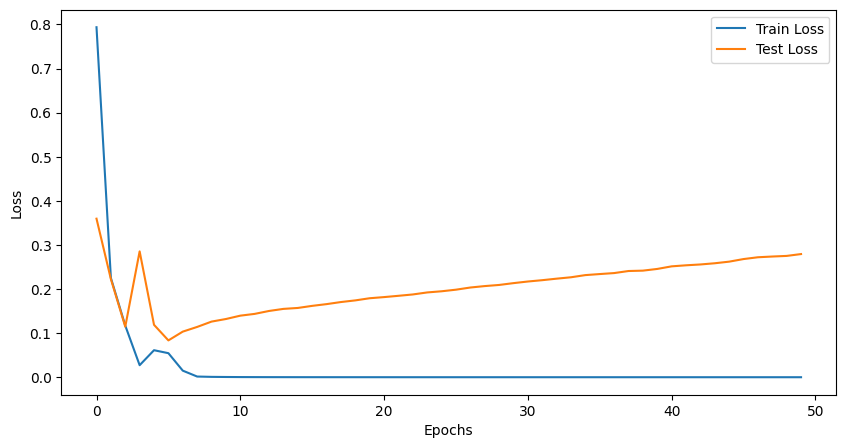

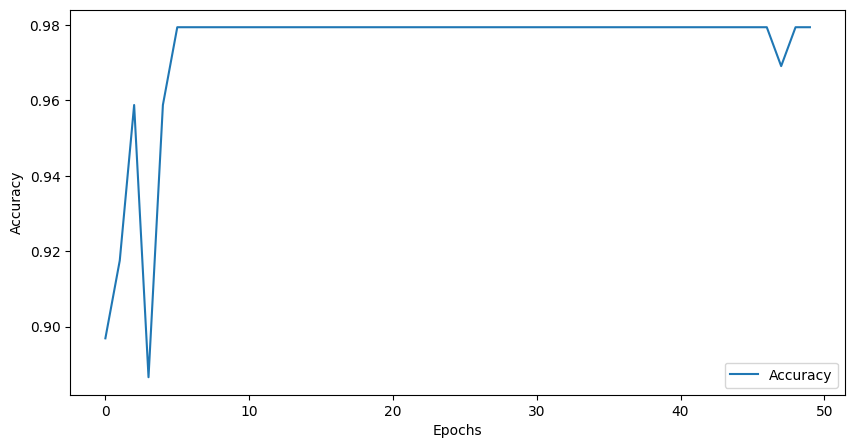

In [9]:
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Initialize model, loss, and optimizer
model = CNN()
criterion = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)

# Training loop
@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        outputs = model(inputs)
        loss = criterion(labels, outputs)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

def train(model, train_loader):
    running_loss = 0.0
    for inputs, labels in train_loader:
        loss = train_step(inputs, labels)
        running_loss += loss.numpy()
    return running_loss / len(train_loader)

# Test loop
@tf.function
def test_step(inputs, labels):
    outputs = model(inputs)
    loss = criterion(labels, outputs)
    _, predicted = tf.math.top_k(outputs, k=1)
    predicted = tf.reshape(predicted, [-1])
    accuracy = tf.math.reduce_mean(tf.cast(tf.math.equal(predicted, labels), tf.float32))
    return loss, predicted, accuracy

def test(model, test_loader):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    incorrect_counts = [0, 0, 0]  # Initialize counts for each class
    for inputs, labels in test_loader:
        loss, predicted, accuracy = test_step(inputs, labels)
        running_loss += loss.numpy()
        correct_predictions += tf.math.reduce_sum(tf.cast(tf.math.equal(predicted, labels), tf.int32)).numpy()
        total_samples += labels.shape[0]

        # Find incorrect predictions
        incorrect_mask = tf.math.not_equal(predicted, labels)
        incorrect_indices = tf.where(incorrect_mask)
        incorrect_classes = tf.gather(predicted, incorrect_indices)

        # Count incorrect predictions for each class
        for class_label in range(3):
            incorrect_counts[class_label] += tf.math.reduce_sum(tf.cast(tf.math.equal(incorrect_classes, class_label), tf.int32)).numpy()

    accuracy = correct_predictions / total_samples
    return running_loss / len(test_loader), accuracy, incorrect_counts

# Training and evaluation
num_epochs = 50
train_losses, test_losses, accuracies = [], [], []
for epoch in range(num_epochs):
    train_loss = train(model, train_loader)
    test_loss, accuracy, _ = test(model, test_loader)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    accuracies.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: "
          f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Certainly! Let's go through each line of the code and explain it in detail, assuming no prior knowledge of the subject.

```python
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
```
- These lines import the necessary libraries and modules for our code.
- `import tensorflow as tf`: This line imports the TensorFlow library, which is a popular deep learning framework. We use the alias `tf` to refer to TensorFlow throughout the code.
- `from tensorflow.keras.losses import SparseCategoricalCrossentropy`: This line imports the `SparseCategoricalCrossentropy` loss function from the `tensorflow.keras.losses` module. This loss function is commonly used for multi-class classification problems.
- `from tensorflow.keras.optimizers import Adam`: This line imports the `Adam` optimizer from the `tensorflow.keras.optimizers` module. The `Adam` optimizer is a widely used optimization algorithm for training deep learning models.
- `import matplotlib.pyplot as plt`: This line imports the `matplotlib` library, specifically the `pyplot` module, which is used for creating visualizations and plots. We use the alias `plt` to refer to `pyplot` throughout the code.

```python
model = CNN()
criterion = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)
```
- `model = CNN()`: This line creates an instance of the `CNN` class, which represents our convolutional neural network model. We assume that the `CNN` class is defined elsewhere in the code.
- `criterion = SparseCategoricalCrossentropy()`: This line creates an instance of the `SparseCategoricalCrossentropy` loss function, which will be used to measure the difference between the predicted and actual class labels during training.
- `optimizer = Adam(learning_rate=0.001)`: This line creates an instance of the `Adam` optimizer with a learning rate of 0.001. The learning rate determines the step size at which the model's weights are updated during training.

```python
@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        outputs = model(inputs)
        loss = criterion(labels, outputs)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss
```
- `@tf.function`: This line is a decorator that tells TensorFlow to compile the `train_step` function for faster execution. It optimizes the function for performance.
- `def train_step(inputs, labels):`: This line defines a function called `train_step` that takes `inputs` (the input data) and `labels` (the corresponding class labels) as arguments. This function represents a single training step.
- `with tf.GradientTape() as tape:`: This line starts a `GradientTape` context, which records the operations performed inside the context for automatic differentiation. It allows us to compute gradients of the loss with respect to the model's trainable variables.
- `outputs = model(inputs)`: This line passes the `inputs` through the `model` to obtain the predicted outputs.
- `loss = criterion(labels, outputs)`: This line computes the loss between the true `labels` and the predicted `outputs` using the `criterion` loss function.
- `gradients = tape.gradient(loss, model.trainable_variables)`: This line computes the gradients of the `loss` with respect to the model's trainable variables using the recorded operations in the `GradientTape`.
- `optimizer.apply_gradients(zip(gradients, model.trainable_variables))`: This line applies the computed gradients to update the model's trainable variables using the `optimizer`. The `zip` function pairs the gradients with their corresponding variables.
- `return loss`: This line returns the computed loss value.

```python
def train(model, train_loader):
    running_loss = 0.0
    for inputs, labels in train_loader:
        loss = train_step(inputs, labels)
        running_loss += loss.numpy()
    return running_loss / len(train_loader)
```
- `def train(model, train_loader):`: This line defines a function called `train` that takes the `model` and the `train_loader` (the data loader for the training data) as arguments. This function handles the training loop for one epoch.
- `running_loss = 0.0`: This line initializes a variable `running_loss` to keep track of the accumulated loss during the training loop.
- `for inputs, labels in train_loader:`: This line starts a loop that iterates over the batches of data provided by the `train_loader`. In each iteration, `inputs` represents a batch of input data, and `labels` represents the corresponding class labels.
- `loss = train_step(inputs, labels)`: This line calls the `train_step` function with the current batch of `inputs` and `labels` to perform a single training step and obtain the loss value.
- `running_loss += loss.numpy()`: This line adds the current batch's loss value to the `running_loss`. The `numpy()` function is used to convert the loss tensor to a scalar value.
- `return running_loss / len(train_loader)`: This line computes the average loss over all the batches in the training data by dividing the `running_loss` by the number of batches (`len(train_loader)`). It returns this average loss value.

```python
@tf.function
def test_step(inputs, labels):
    outputs = model(inputs)
    loss = criterion(labels, outputs)
    _, predicted = tf.math.top_k(outputs, k=1)
    predicted = tf.reshape(predicted, [-1])
    accuracy = tf.math.reduce_mean(tf.cast(tf.math.equal(predicted, labels), tf.float32))
    return loss, predicted, accuracy
```
- `@tf.function`: Similar to the `train_step` function, this line is a decorator that tells TensorFlow to compile the `test_step` function for faster execution.
- `def test_step(inputs, labels):`: This line defines a function called `test_step` that takes `inputs` (the input data) and `labels` (the corresponding class labels) as arguments. This function represents a single test step.
- `outputs = model(inputs)`: This line passes the `inputs` through the `model` to obtain the predicted outputs.
- `loss = criterion(labels, outputs)`: This line computes the loss between the true `labels` and the predicted `outputs` using the `criterion` loss function.
- `_, predicted = tf.math.top_k(outputs, k=1)`: This line finds the index of the highest predicted probability for each sample using `tf.math.top_k`. The `k=1` argument specifies that we want to find the top 1 prediction. The underscore `_` is used to ignore the returned values (in this case, the top probabilities) that we don't need.
- `predicted = tf.reshape(predicted, [-1])`: This line reshapes the `predicted` tensor to a 1-dimensional tensor, flattening it along the first dimension. The `-1` argument indicates that the size of that dimension should be inferred automatically.
- `accuracy = tf.math.reduce_mean(tf.cast(tf.math.equal(predicted, labels), tf.float32))`: This line computes the accuracy of the predictions. It first compares the `predicted` labels with the true `labels` using `tf.math.equal`, which returns a boolean tensor. Then, it casts the boolean tensor to float32 using `tf.cast` and computes the mean accuracy using `tf.math.reduce_mean`.
- `return loss, predicted, accuracy`: This line returns the computed loss value, the predicted labels, and the accuracy.

```python
def test(model, test_loader):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    incorrect_counts = [0, 0, 0]  # Initialize counts for each class
    for inputs, labels in test_loader:
        loss, predicted, accuracy = test_step(inputs, labels)
        running_loss += loss.numpy()
        correct_predictions += tf.math.reduce_sum(tf.cast(tf.math.equal(predicted, labels), tf.int32)).numpy()
        total_samples += labels.shape[0]
        
        # Find incorrect predictions
        incorrect_mask = tf.math.not_equal(predicted, labels)
        incorrect_indices = tf.where(incorrect_mask)
        incorrect_classes = tf.gather(predicted, incorrect_indices)
        
        # Count incorrect predictions for each class
        for class_label in range(3):
            incorrect_counts[class_label] += tf.math.reduce_sum(tf.cast(tf.math.equal(incorrect_classes, class_label), tf.int32)).numpy()
    
    accuracy = correct_predictions / total_samples
    return running_loss / len(test_loader), accuracy, incorrect_counts
```
- `def test(model, test_loader):`: This line defines a function called `test` that takes the `model` and the `test_loader` (the data loader for the test data) as arguments. This function handles the evaluation loop for the test data.
- `running_loss = 0.0`: This line initializes a variable `running_loss` to keep track of the accumulated loss during the evaluation loop.
- `correct_predictions = 0`: This line initializes a variable `correct_predictions` to keep track of the number of correct predictions.
- `total_samples = 0`: This line initializes a variable `total_samples` to keep track of the total number of samples in the test data.
- `incorrect_counts = [0, 0, 0]`: This line initializes a list `incorrect_counts` to keep track of the count of incorrect predictions for each class. In this example, we assume there are 3 classes.
- `for inputs, labels in test_loader:`: This line starts a loop that iterates over the batches of data provided by the `test_loader`. In each iteration, `inputs` represents a batch of input data, and `labels` represents the corresponding class labels.
- `loss, predicted, accuracy = test_step(inputs, labels)`: This line calls the `test_step` function with the current batch of `inputs` and `labels` to perform a single test step and obtain the loss value, predicted labels, and accuracy.
- `running_loss += loss.numpy()`: This line adds the current batch's loss value to the `running_loss`. The `numpy()` function is used to convert the loss tensor to a scalar value.
- `correct_predictions += tf.math.reduce_sum(tf.cast(tf.math.equal(predicted, labels), tf.int32)).numpy()`: This line computes the number of correct predictions in the current batch by comparing the `predicted` labels with the true `labels` using `tf.math.equal`, casting the boolean tensor to int32 using `tf.cast`, and summing up the correct predictions using `tf.math.reduce_sum`. The result is then added to the `correct_predictions` variable.
- `total_samples += labels.shape[0]`: This line updates the `total_samples` by adding the number of samples in the current batch, which is obtained from `labels.shape[0]`.
- `incorrect_mask = tf.math.not_equal(predicted, labels)`: This line creates a boolean mask `incorrect_mask` that indicates which predictions are incorrect by comparing the `predicted` labels with the true `labels` using `tf.math.not_equal`.
- `incorrect_indices = tf.where(incorrect_mask)`: This line finds the indices of the incorrect predictions using `tf.where`, which returns the indices where the `incorrect_mask` is True.
- `incorrect_classes = tf.gather(predicted, incorrect_indices)`: This line gathers the predicted class labels for the incorrect predictions using `tf.gather`, which selects the elements from `predicted` based on the `incorrect_indices`.
- `for class_label in range(3):`: This line starts a loop that iterates over each class label (assuming there are 3 classes in this example).
- `incorrect_counts[class_label] += tf.math.reduce_sum(tf.cast(tf.math.equal(incorrect_classes, class_label), tf.int32)).numpy()`: This line counts the number of incorrect predictions for the current class label. It compares the `incorrect_classes` with the current `class_label` using `tf.math.equal`, casts the boolean tensor to int32 using `tf.cast`, sums up the count using `tf.math.reduce_sum`, and adds the result to the corresponding element of the `incorrect_counts` list.
- `accuracy = correct_predictions / total_samples`: This line computes the overall accuracy by dividing the total number of correct predictions (`correct_predictions`) by the total number of samples (`total_samples`).
- `return running_loss / len(test_loader), accuracy, incorrect_counts`: This line returns the average loss over all the batches in the test data (computed by dividing `running_loss` by the number of batches `len(test_loader)`), the overall accuracy, and the list of incorrect counts for each class.

```python
num_epochs = 50
train_losses, test_losses, accuracies = [], [], []
for epoch in range(num_epochs):
    train_loss = train(model, train_loader)
    test_loss, accuracy, _ = test(model, test_loader)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    accuracies.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: "
          f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")
```
- `num_epochs = 50`: This line sets the number of epochs for training the model. An epoch is a complete pass through the entire training dataset.
- `train_losses, test_losses, accuracies = [], [], []`: This line initializes three empty lists to store the training losses, test losses, and accuracies for each epoch.
- `for epoch in range(num_epochs):`: This line starts a loop that iterates for `num_epochs` times, representing each epoch of training.
- `train_loss = train(model, train_loader)`: This line calls the `train` function with the `model` and `train_loader` to perform training for one epoch and obtain the training loss.
- `test_loss, accuracy, _ = test(model, test_loader)`: This line calls the `test` function with the `model` and `test_loader` to perform evaluation on the test data and obtain the test loss, accuracy, and incorrect counts (which are ignored using `_`).
- `train_losses.append(train_loss)`: This line appends the training loss for the current epoch to the `train_losses` list.
- `test_losses.append(test_loss)`: This line appends the test loss for the current epoch to the `test_losses` list.
- `accuracies.append(accuracy)`: This line appends the accuracy for the current epoch to the `accuracies` list.
- `print(f"Epoch {epoch + 1}/{num_epochs}: " f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")`: This line prints the progress information for each epoch, including the current epoch number, training loss, test loss, and accuracy. The `.4f` format specifier is used to display the values with 4 decimal places.

```python
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
```
- `plt.figure(figsize=(10, 5))`: This line creates a new figure with a specified size of 10 inches wide and 5 inches tall.
- `plt.plot(train_losses, label='Train Loss')`: This line plots the training losses stored in the `train_losses` list against the number of epochs. The `label` argument is used to assign a label to the plot line.
- `plt.plot(test_losses, label='Test Loss')`: This line plots the test losses stored in the `test_losses` list against the number of epochs. The `label` argument is used to assign a label to the plot line.
- `plt.xlabel('Epochs')`: This line sets the label for the x-axis of the plot, indicating that the x-axis represents the number of epochs.
- `plt.ylabel('Loss')`: This line sets the label for the y-axis of the plot, indicating that the y-axis represents the loss values.
- `plt.legend()`: This line adds a legend to the plot, showing the labels for each plot line.
- `plt.show

In [11]:
test_loss, accuracy, _ = test(model, test_loader)

In [12]:
test_loss

0.27930348174873776

In [13]:
accuracy

0.979381443298969